In [0]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [0]:
X_train=X_train/255
X_test=X_test/255

X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [0]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
datagen.fit(X_train)


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import Adam


model=Sequential()
model.add(Conv2D(filters=30,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=60,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

adam=Adam(lr=0.001)

model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])


In [31]:
history=model.fit_generator(datagen.flow(X_train,y_train,batch_size=200),steps_per_epoch=500,epochs=20,validation_data=(X_test,y_test),shuffle=1)

Epoch 1/20
500/500 [==============================] - 37s 74ms/step - loss: 0.3089 - acc: 0.9044 - val_loss: 0.0455 - val_acc: 0.9854
Epoch 2/20
500/500 [==============================] - 32s 65ms/step - loss: 0.0952 - acc: 0.9715 - val_loss: 0.0406 - val_acc: 0.9857
Epoch 3/20
500/500 [==============================] - 32s 65ms/step - loss: 0.0668 - acc: 0.9790 - val_loss: 0.0339 - val_acc: 0.9883
Epoch 4/20
500/500 [==============================] - 32s 65ms/step - loss: 0.0565 - acc: 0.9827 - val_loss: 0.0247 - val_acc: 0.9910
Epoch 5/20
500/500 [==============================] - 32s 65ms/step - loss: 0.0467 - acc: 0.9854 - val_loss: 0.0188 - val_acc: 0.9939
Epoch 6/20
500/500 [==============================] - 32s 65ms/step - loss: 0.0422 - acc: 0.9867 - val_loss: 0.0217 - val_acc: 0.9927
Epoch 7/20
500/500 [==============================] - 32s 65ms/step - loss: 0.0401 - acc: 0.9877 - val_loss: 0.0247 - val_acc: 0.9909
Epoch 8/20
500/500 [==============================] - 32s 64ms

Text(0.5, 0, 'epochs')

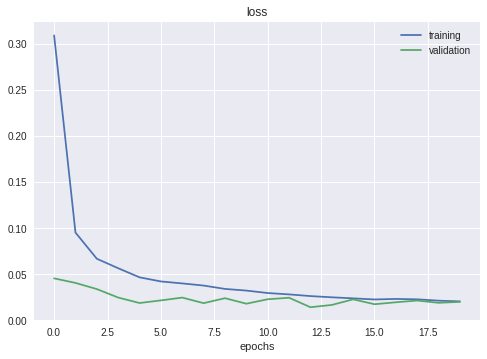

In [33]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epochs')


Text(0.5, 0, 'epochs')

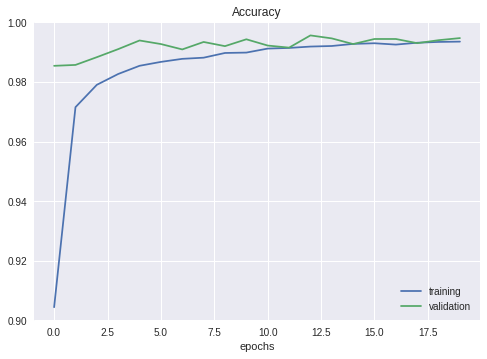

In [35]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epochs')


In [0]:
model.save('digit_improved.h5')

In [0]:
from google.colab import files
files.download('digit_improved.h5')